In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [122]:
dataset = pd.read_csv('./sports-olympics/Cost_games.csv')

dataset = dataset.drop('Country', axis=1) 
dataset = dataset.drop('Type', axis=1)

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset

,Year,Events,Athletes,"Cost, Billion USD"
0,1964,163,5152,0.282
1,1972,195,7234,1.009
2,1976,198,6048,6.093
3,1980,203,5179,6.331
4,1984,221,6829,0.719
5,1992,257,9356,9.687
6,1996,271,10318,4.143
7,2000,300,10651,5.026
8,2004,301,10625,2.942
9,2008,302,10942,6.810


In [123]:
# Handle categorical variable - State column
#labelencoder_X = LabelEncoder()
#X[:,2] = labelencoder_X.fit_transform(X[:, 2])
#X[:,1] = labelencoder_X.fit_transform(X[:, 1])
#hotonencoder_X = OneHotEncoder(categorical_features = 'auto')
#X = hotonencoder_X.fit_transform(X).toarray()

# Avoiding the dummy trap
#X = X[:, 1:] #R&D is removed by this
X

array([[ 1964,   163,  5152],
       [ 1972,   195,  7234],
       [ 1976,   198,  6048],
       [ 1980,   203,  5179],
       [ 1984,   221,  6829],
       [ 1992,   257,  9356],
       [ 1996,   271, 10318],
       [ 2000,   300, 10651],
       [ 2004,   301, 10625],
       [ 2008,   302, 10942],
       [ 2012,   302, 10568],
       [ 2016,   306, 10500],
       [ 1964,    34,  1091],
       [ 1968,    35,  1158],
       [ 1972,    35,  1006],
       [ 1976,    37,  1123],
       [ 1980,    38,  1072],
       [ 1988,    46,  1432],
       [ 1992,    57,  1801],
       [ 1994,    61,  1737],
       [ 1998,    68,  2176],
       [ 2002,    78,  2399],
       [ 2006,    84,  2508],
       [ 2010,    86,  2566],
       [ 2014,    98,  2780]], dtype=int64)

In [124]:

# We are going to keep 20% of the dataset in test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_train_1 = poly.fit_transform(X_train)
X_test_1 = poly.fit_transform(X_test)

clf = linear_model.LinearRegression()
clf.fit(X_train_1, y_train)
y_test = clf.predict(X_test_1)

In [126]:
X_test

array([[ 1992,   257,  9356],
       [ 1976,   198,  6048],
       [ 1994,    61,  1737],
       [ 1980,    38,  1072],
       [ 2016,   306, 10500]], dtype=int64)

In [127]:
testing = np.array([2,3])


Tokyo = np.array([[2020, 321 , 10616]] )   

In [128]:
y_test


array([ 2.51757312, -0.1961565 ,  3.77168149,  0.34820406, 16.20138682])

In [129]:
testing

array([2, 3])

In [130]:
Tokyo = poly.fit_transform(Tokyo)
Tokyo

array([[1.00000000e+00, 2.02000000e+03, 3.21000000e+02, 1.06160000e+04,
        4.08040000e+06, 6.48420000e+05, 2.14443200e+07, 1.03041000e+05,
        3.40773600e+06, 1.12699456e+08]])

In [131]:
clf.predict(Tokyo)

array([22.46355255])

In [132]:
X_train

array([[ 2006,    84,  2508],
       [ 1988,    46,  1432],
       [ 2014,    98,  2780],
       [ 2010,    86,  2566],
       [ 1972,    35,  1006],
       [ 1972,   195,  7234],
       [ 2012,   302, 10568],
       [ 1968,    35,  1158],
       [ 2004,   301, 10625],
       [ 1996,   271, 10318],
       [ 1992,    57,  1801],
       [ 1984,   221,  6829],
       [ 2008,   302, 10942],
       [ 2000,   300, 10651],
       [ 1998,    68,  2176],
       [ 1980,   203,  5179],
       [ 1964,   163,  5152],
       [ 2002,    78,  2399],
       [ 1976,    37,  1123],
       [ 1964,    34,  1091]], dtype=int64)

In [133]:
yy = clf.predict(X_train_1)

yy

array([ 7.61887677, -1.79417502, 16.54341632,  8.54096454,  1.27827671,
        1.15959433, 11.90324031,  0.65932803,  6.10236395,  3.96857494,
       -0.77215688,  2.45081693,  7.87695935,  3.56161526,  0.15908196,
        6.22991948, -1.65469147,  4.21411616, -0.15456673,  2.12144506])

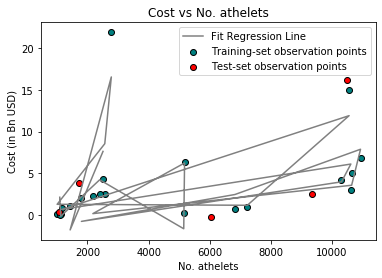

In [134]:
plt.scatter(X_train[:,2], y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train[:,2], yy, color='grey', label='Fit Regression Line')
plt.title('Cost vs No. athelets')
plt.xlabel('No. athelets')
plt.ylabel('Cost (in Bn USD)')

plt.scatter(X_test[:,2], y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()